In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [69]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/anandshaw2001/netflix-movies-and-tv-shows/versions/1


In [70]:
import os

directory_path = '/root/.cache/kagglehub/datasets/anandshaw2001/netflix-movies-and-tv-shows/versions/1'
files = os.listdir(directory_path)
print("Files in directory:", files)

csv_file = [file for file in files if file.endswith('.csv')][0]
csv_path = os.path.join(directory_path, csv_file)

df = pd.read_csv(csv_path)
df.head()

Files in directory: ['netflix_titles.csv']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [72]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [73]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [74]:
df.duplicated().sum()

0

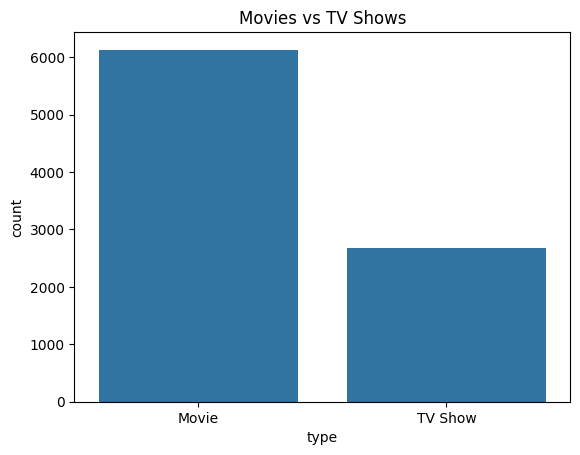

In [75]:
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows')
plt.show()

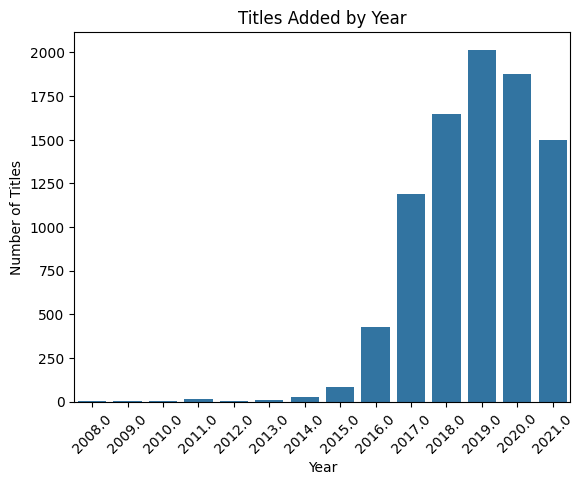

In [76]:
# Convert 'date_added' to datetime and extract the year
df['date_added'] = df['date_added'].str.strip() # to remove empty space in the start or in the back
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

# Bar plot for titles added each year
yearly_titles = df.groupby('year_added')['show_id'].count().reset_index()
sns.barplot(x='year_added', y='show_id', data=yearly_titles)
plt.title('Titles Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

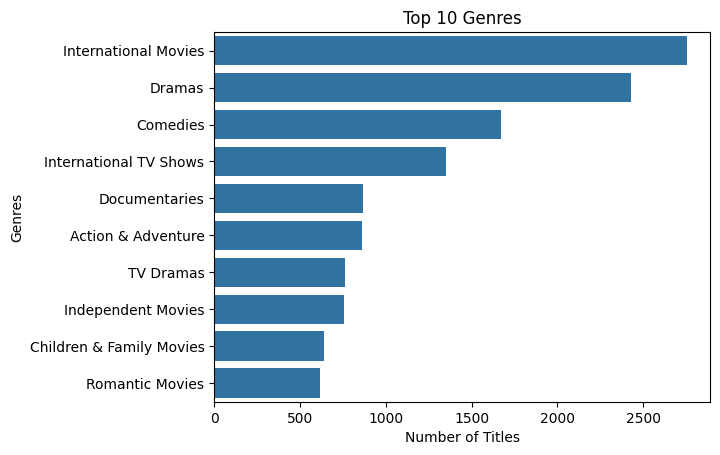

In [77]:
genres = df['listed_in'].str.split(',').explode().str.strip()

# Count plot for the top 10 genres
top_genres = genres.value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']

# Bar plot for the top 10 genres
sns.barplot(y='Genre', x='Count', data=top_genres)
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()

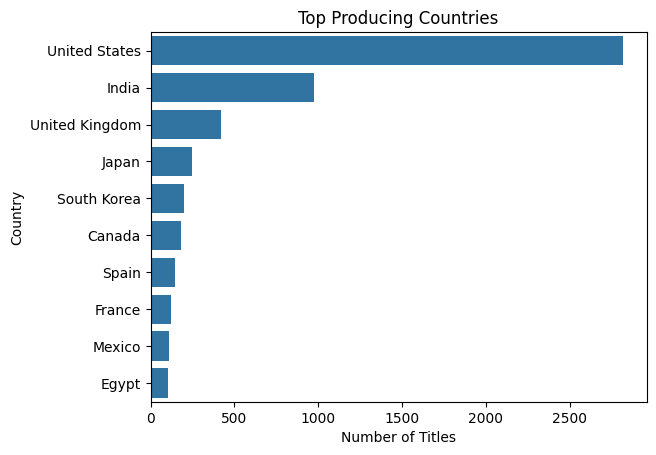

In [78]:
# Bar plot for top producing countries
top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']  # Renaming columns for clarity

# Bar plot for the top producing countries
sns.barplot(y='Country', x='Count', data=top_countries)
plt.title('Top Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


<ipython-input-79-14aff889949a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)


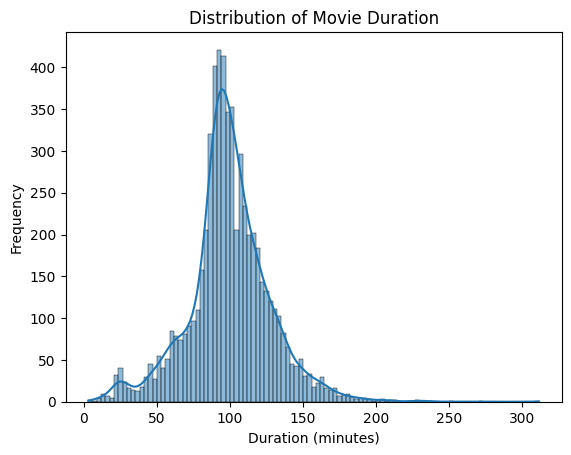

In [79]:
# Filter movies and convert duration to numeric
df_movies = df[df['type'] == 'Movie']
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Histogram for movie duration
sns.histplot(df_movies['duration'], kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-80-1022ecd05048>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvshows['seasons'] = df_tvshows['duration'].str.extract('(\d+)').astype(int)


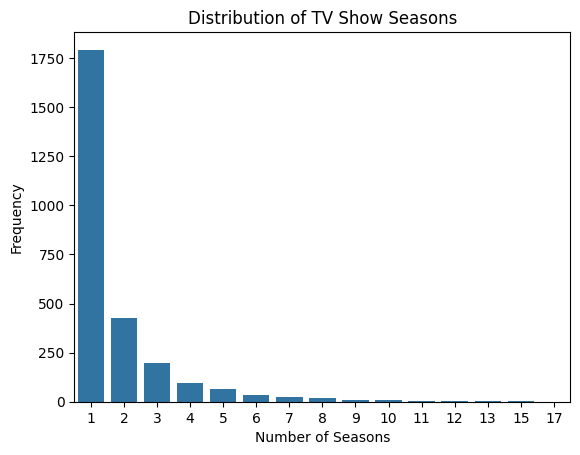

In [80]:
# Filter TV shows and extract the number of seasons
df_tvshows = df[df['type'] == 'TV Show']
df_tvshows['seasons'] = df_tvshows['duration'].str.extract('(\d+)').astype(int)

# Count plot for number of seasons
sns.countplot(x='seasons', data=df_tvshows)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()


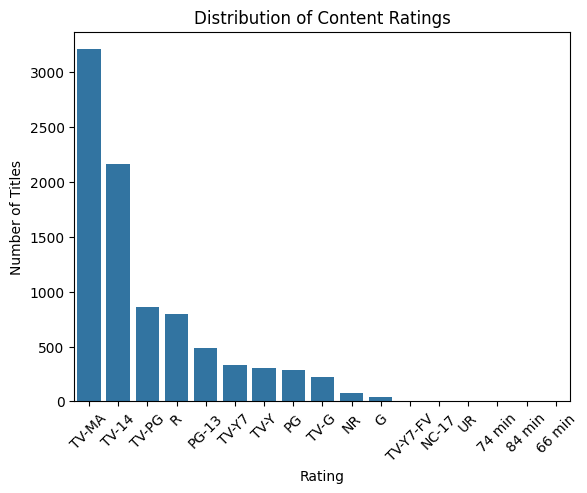

In [81]:
# Count plot for content ratings
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


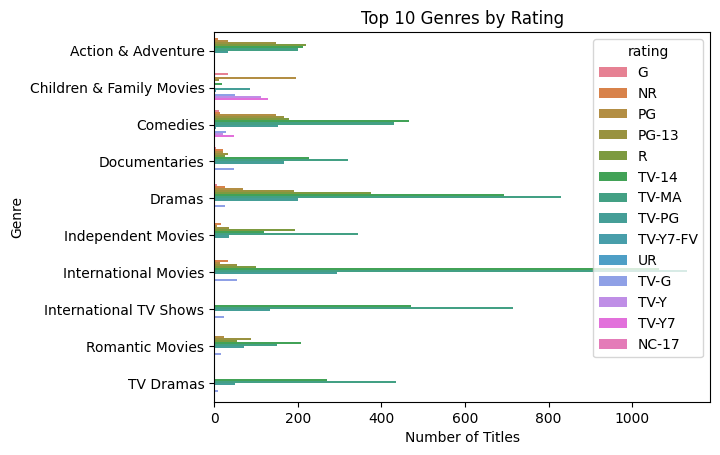

In [87]:
# Split genres and merge them with ratings
genres_exploded = df[['rating', 'listed_in']].copy()
genres_exploded['listed_in'] = genres_exploded['listed_in'].str.split(',')
genres_exploded = genres_exploded.explode('listed_in')

# Remove leading/trailing spaces
genres_exploded['listed_in'] = genres_exploded['listed_in'].str.strip()

# Group by 'listed_in' and 'rating' to count the occurrences
genre_rating_counts = genres_exploded.groupby(['listed_in', 'rating']).size().reset_index(name='count')

# Sort genres by their total count (use this for ordering in the plot)
top_genres = genres_exploded['listed_in'].value_counts().index[:10]

# Bar plot for top 10 genres by rating
sns.barplot(y='listed_in', x='count', hue='rating', data=genre_rating_counts[genre_rating_counts['listed_in'].isin(top_genres)])
plt.title('Top 10 Genres by Rating')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


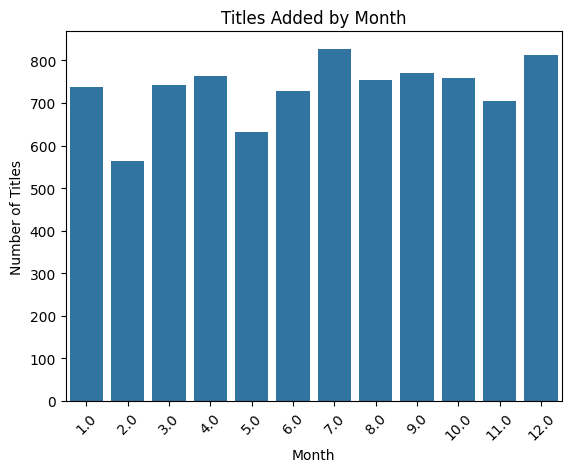

In [86]:
# Extract month from 'date_added'
df['month_added'] = pd.to_datetime(df['date_added']).dt.month

# Group by month and plot
monthly_titles = df.groupby('month_added')['show_id'].count().reset_index()
sns.barplot(x='month_added', y='show_id', data=monthly_titles)
plt.title('Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()
